In [488]:
# This piece of code blocks the warning messages
import warnings 
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns;sns.set()
from scipy import stats
from scipy.stats import norm, skew #for some statistics

# inline 그림 출력
%matplotlib inline
# 그래프 ggplot 스타일 사용
plt.style.use('ggplot')
# 한글출력
mpl.rc('font', family='D2Coding')
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

print('Python version ' + sys.version)
print('Numpy version ' + np.__version__)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + mpl.__version__ )
print('Missingno version ' + msno.__version__)
print('seaborn version ' + sns.__version__)

Python version 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Numpy version 1.14.3
Pandas version 0.23.0
Matplotlib version 3.0.2
Missingno version 0.4.1
seaborn version 0.9.0


In [489]:
train = pd.read_csv('train.csv', parse_dates=["SalePrice"])
test = pd.read_csv('test.csv')
train_house = train.copy()
test_house = test.copy()

In [490]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [491]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


### Handling Missgin Data - Mediaum 

 https://medium.com/@numanyilmaz61/handling-missing-data-93d3ce5d0161  
 https://medium.com/ibm-data-science-experience/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87  
 https://medium.com/fintechexplained/processing-data-to-improve-machine-learning-models-accuracy-de17c655dc8e

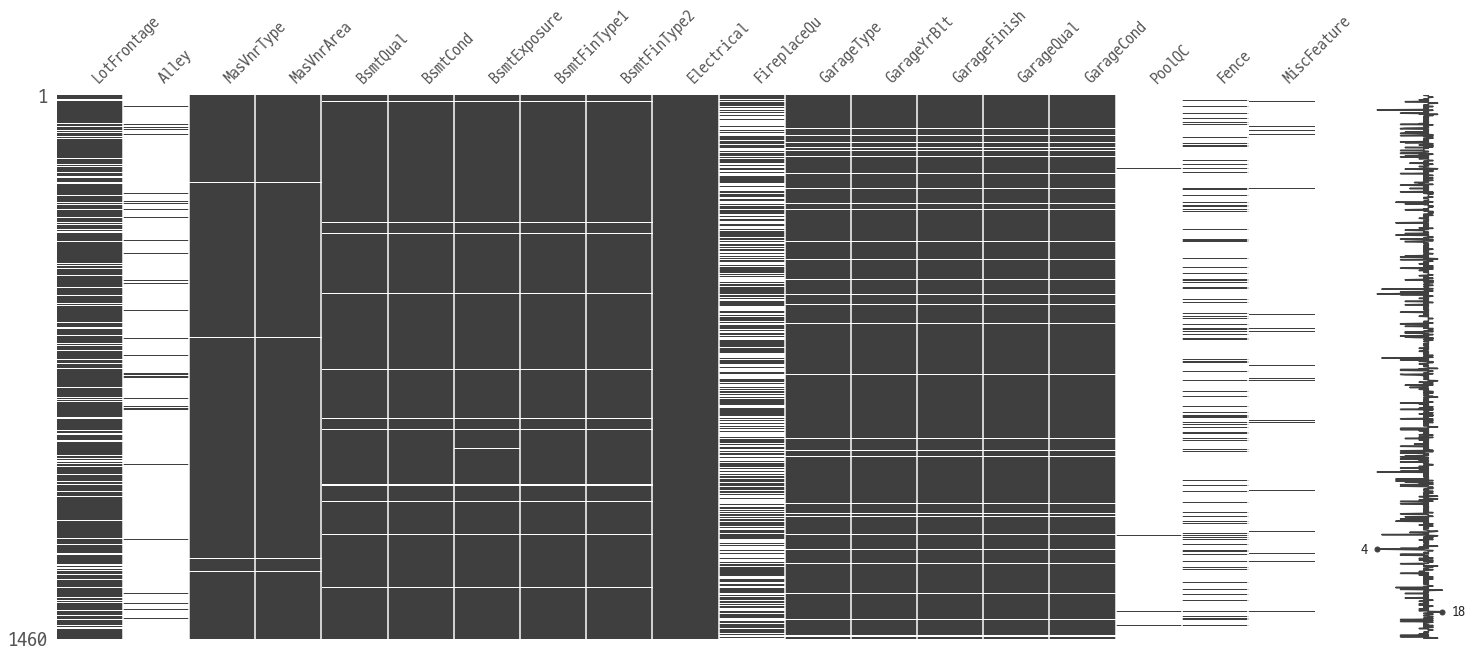

In [492]:
missingdata_train = train.columns[train.isnull().any()].tolist()
msno.matrix(train[missingdata_train])

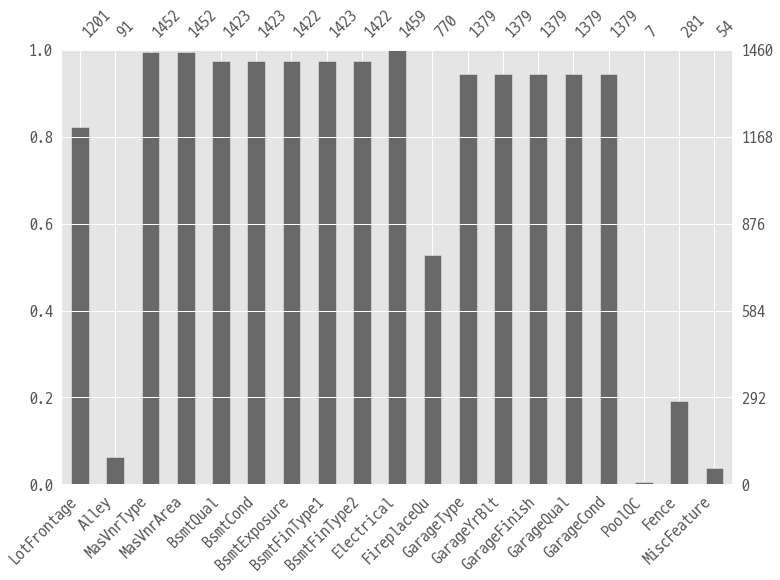

In [493]:
msno.bar(train[missingdata_train],  figsize=(12,8))
# train - 1460개

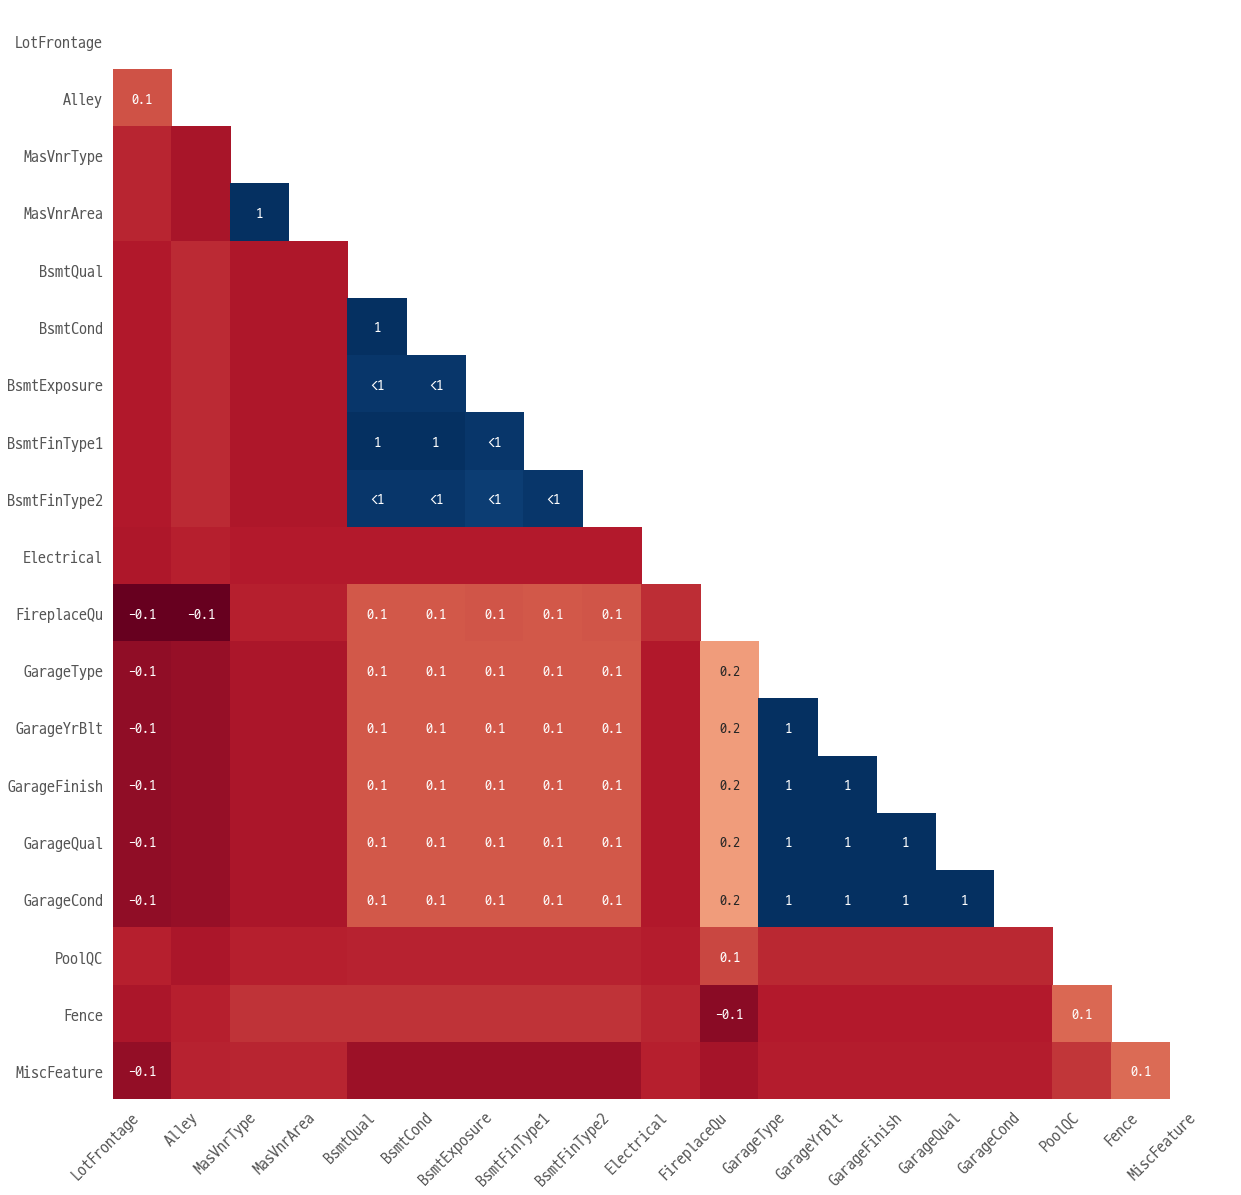

In [494]:
msno.heatmap(train[missingdata_train], figsize=(20,20)) 
#  nullity correlation~~
# -0.05 < R < 0.05, no value will be displayed.
# R=1, 1개의 feature가 missing이면 다른 하나의 feature도 missing.
# R=-1, 1개의 feature가 missing이면 다른 하나는 not missing.

In [495]:
# train["LotFrontage"].median() - 69
# test["LotFrontage"].median() - 67

Text(0.5, 1.0, 'test set')

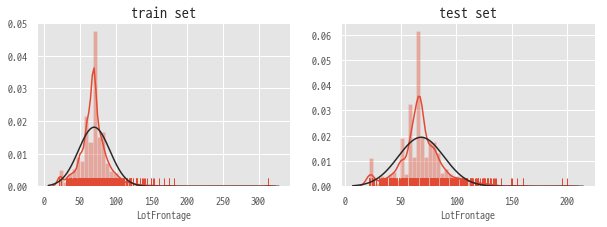

In [496]:
# LotFrontAge - linear feet of street connected to property, Ordinal 
#  NA(259, 17%) --> '0' or median
## replace -> 0
# train["LotFrontage"].fillna(value=0, inplace=True)  # 
## replace -> median
train["LotFrontage"].fillna(train["LotFrontage"].median(), inplace=True)  # 
test["LotFrontage"].fillna(test["LotFrontage"].median(), inplace=True)  # 

#  
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))

sns.distplot(train["LotFrontage"],fit=norm,rug=True, ax=ax1)
ax1.set_title('train set')
sns.distplot(test["LotFrontage"],fit=norm,rug=True, ax=ax2)
ax2.set_title('test set')

In [497]:
# Alley - Type of alley access to property , category
# NA(NaN, 1369) -> 'None'

train["Alley"].fillna(value='None', inplace=True)
test["Alley"].fillna(value='None', inplace=True)

Text(0.5, 1.0, 'Test set')

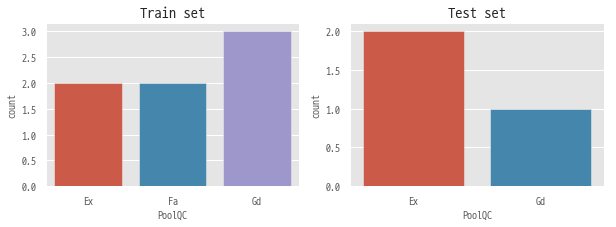

In [498]:
# PoolQC 
# poolCate=['None', 'Ex', 'Fa', 'Gd'] # 1453, 3, 2, 2  - train
# poolCate=['None', 'Ex', 'Fa', 'Gd'] # 1459, 2, 0, 1  - test
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))

sns.countplot(x="PoolQC", data=train, ax=ax1)
ax1.set_title('Train set')
sns.countplot(x="PoolQC", data=test, ax=ax2)
ax2.set_title('Test set')

Text(0.5, 1.0, 'Test set')

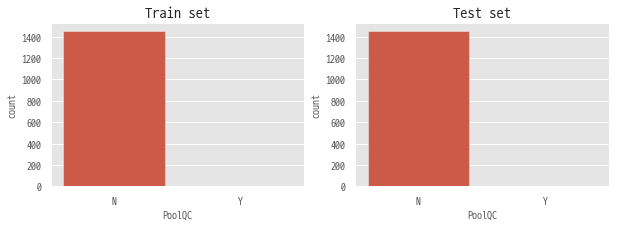

In [499]:
# PoolQC - NA(1453), Category, 

# 방법1.  Index(['None', 'Ex', 'Fa', 'Gd'], dtype='object')
# train["PoolQC"].fillna(value='None', inplace=True)
# train["PoolQC"].value_counts()
# poolCate=['None', 'Ex', 'Fa', 'Gd'] # 1453, 3, 2, 2
# sns.countplot(x="PoolQC", data=train)

## 방법2. NA - N, others - Y
#train set
train["PoolQC"].fillna(value='N', inplace=True)
train["PoolQC"].loc[train["PoolQC"] == 'Gd']='Y'
train["PoolQC"].loc[train["PoolQC"] == 'Fa']='Y'
train["PoolQC"].loc[train["PoolQC"] == 'Ex']='Y'

# test set
test["PoolQC"].fillna(value='N', inplace=True)
test["PoolQC"].loc[test["PoolQC"] == 'Gd']='Y'
test["PoolQC"].loc[test["PoolQC"] == 'Fa']='Y'
test["PoolQC"].loc[test["PoolQC"] == 'Ex']='Y'


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))

sns.countplot(x="PoolQC", data=train, ax=ax1) # N:Y = 1453:7
ax1.set_title('Train set')
sns.countplot(x="PoolQC", data=train, ax=ax2) # N:Y = 1457:3
ax2.set_title('Test set')

Text(0.5, 1.0, 'Test set')

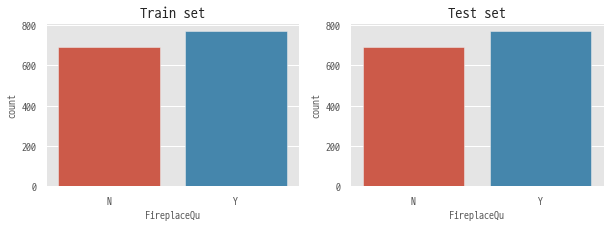

In [500]:
# FireplaceQu(Fireplace quality): 

# train -> NA = 690 --> 'None' 
train["FireplaceQu"].fillna(value='None', inplace=True)
test["FireplaceQu"].fillna(value='None', inplace=True)

# NA(None) --> 'N'(690) else 'Y' 
# Yes/No - Dichotomous variable
train["FireplaceQu"].loc[train["FireplaceQu"] == 'None']='N'
train["FireplaceQu"].loc[train["FireplaceQu"] == 'Gd']='Y'
train["FireplaceQu"].loc[train["FireplaceQu"] == 'TA']='Y'
train["FireplaceQu"].loc[train["FireplaceQu"] == 'Fa']='Y'
train["FireplaceQu"].loc[train["FireplaceQu"] == 'Ex']='Y'
train["FireplaceQu"].loc[train["FireplaceQu"] == 'Po']='Y'
#house["FireplaceQu"].value_counts()

test["FireplaceQu"].loc[test["FireplaceQu"] == 'None']='N'
test["FireplaceQu"].loc[test["FireplaceQu"] == 'Gd']='Y'
test["FireplaceQu"].loc[test["FireplaceQu"] == 'TA']='Y'
test["FireplaceQu"].loc[test["FireplaceQu"] == 'Fa']='Y'
test["FireplaceQu"].loc[test["FireplaceQu"] == 'Ex']='Y'
test["FireplaceQu"].loc[test["FireplaceQu"] == 'Po']='Y'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))

sns.countplot(x="FireplaceQu", data=train, ax=ax1) # 
ax1.set_title('Train set')
sns.countplot(x="FireplaceQu", data=train, ax=ax2) # 
ax2.set_title('Test set')

## Bsmt* 에 대한 NaN 처리 - train

In [501]:
# attributes=["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]
#house["BsmtQual"].isnull().sum()
for col in ("BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"):
    print(f'{col:20} ========>train= %5d, test=%5d' %(train[col].isnull().sum(), test[col].isnull().sum()))
# NaN --> 최빈값으로 교체 

BsmtQual             ========>train=    37, test=   44
BsmtCond             ========>train=    37, test=   45
BsmtExposure         ========>train=    38, test=   44
BsmtFinType1         ========>train=    37, test=   42
BsmtFinType2         ========>train=    38, test=   42


### train set: BsmtExposure, BsmtFinType2가 각각 NaN이 하나더 많다.  
### 또한 test set: BsmtQual, BsmtExposure가 2개, BsmtCond각 3개 NaN이 하나씩 더 있다.

### => 추가로 있는 NaN값은 최빈값으로 대체하여 전체 NaN의 개수가 일치하도록 처리한다.

In [502]:
# train set
# BsmtExposure, BsmtFinType2 의 Nan 처리
train.loc[948,"BsmtExposure"]="No" 
train.loc[332,"BsmtFinType2"]="Unf"

# 다음 attributes에 대한 37개 NaN은 --> None 
attributes=["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]
for col in attributes:
    train[col].fillna(value='None', inplace=True)

In [503]:
# 결과보기
for col in ("BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"):
    print(f'{col:20} ========>train= %5d, test=%5d' %(train[col].isnull().sum(), test[col].isnull().sum()))


BsmtQual             ========>train=     0, test=   44
BsmtCond             ========>train=     0, test=   45
BsmtExposure         ========>train=     0, test=   44
BsmtFinType1         ========>train=     0, test=   42
BsmtFinType2         ========>train=     0, test=   42


In [504]:
# test set
# BsmtCond, BsmtQual, BsmtExposure
test.loc[[580,725,1064],"BsmtCond"]="TA"
test.loc[[757,758],"BsmtQual"]="TA"
test.loc[[27,888],"BsmtExposure"]="No"

# 처리 확인
for col in ("BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"):
    print(f'{col:20} ========>train= %5d, test=%5d' %(train[col].isnull().sum(), test[col].isnull().sum()))

BsmtQual             ========>train=     0, test=   42
BsmtCond             ========>train=     0, test=   42
BsmtExposure         ========>train=     0, test=   42
BsmtFinType1         ========>train=     0, test=   42
BsmtFinType2         ========>train=     0, test=   42


In [505]:
# 다음 attributes에 대한 42개 NaN은 --> None 
for col in ("BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"):
    test[col].fillna(value='None', inplace=True)

In [506]:
# 'GarageQual','GarageCond' 속성  NA(=NaN)  --> No Garage  --> None 
# GarageYrBlt 속성  NA(=NaN)  --> ???
# GarageFinish 속성  NA(=NaN) --> 'None' 
# GarageCars 속성  NA(=NaN) --> 0
# GarageArea 속성  NA(=NaN)--> 0
# ['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']
attributes=['GarageType','GarageFinish','GarageQual','GarageCond']
for col in attributes:
    train[col].fillna(value='None', inplace=True)
    test[col].fillna(value='None', inplace=True)

# 차고가 없는 경우는 'GarageCars','GarageArea'가 모두 NA로 되어 있음 --> 0
attributes=['GarageCars','GarageArea']
for col in attributes:
    train[col].fillna(value=0, inplace=True)    
    test[col].fillna(value=0, inplace=True)    

Text(0.5, 1.0, 'Test')

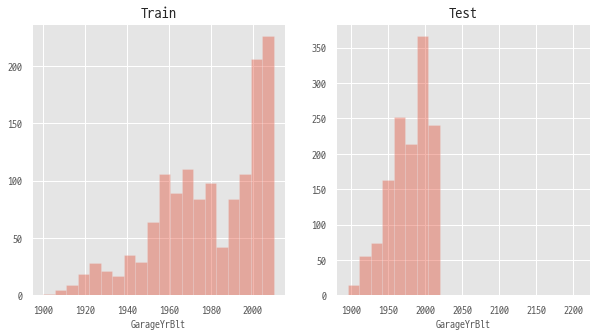

In [507]:
# GarageYrBlt 데이터 처리

f, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))
#ax1.hist(train.loc[train["GarageYrBlt"].notnull(), "GarageYrBlt"], bins=20 )
#ax2.hist(test.loc[train["GarageYrBlt"].notnull(), "GarageYrBlt"], bins=20 )
sns.distplot(train.loc[train["GarageYrBlt"].notnull(), "GarageYrBlt"], kde=False,bins=20, ax=ax1)
sns.distplot(test.loc[test["GarageYrBlt"].notnull(), "GarageYrBlt"], kde=False,bins=20, ax=ax2)
ax1.set_title('Train')
ax2.set_title('Test')

# test set에 GarageYrBlt = 2207인 데이터가 1개 존재함.  수정을 해야할까?  Yes)(-> 2007)

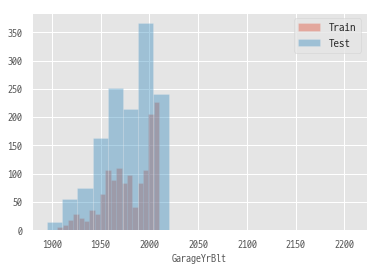

In [508]:
sns.distplot(train.loc[train["GarageYrBlt"].notnull(), "GarageYrBlt"], kde=False,bins=20)
sns.distplot(test.loc[test["GarageYrBlt"].notnull(), "GarageYrBlt"], kde=False,bins=20)
plt.legend(['Train','Test'])

In [509]:
# GarageYrBlt 데이터 임시 저장 
tmpTrain = train["GarageYrBlt"].copy()
tmpTest = test["GarageYrBlt"].copy()
#train["GarageYrBlt"] = tmpTrain
#test["GarageYrBlt"] = tmpTest




In [510]:
# 2207년 수정
# 2007년인 행 찾기, Id=2593
test.loc[test["GarageYrBlt"]==2207]  
#test.loc[1132,"GarageYrBlt"]=2007

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1132,2593,20,RL,68.0,8298,Pave,None,IR1,HLS,AllPub,...,0,0,N,NaN,NaN,0,9,2007,New,Partial


In [511]:
test.loc[1132,"GarageYrBlt"]=2007
test.loc[1132,"GarageYrBlt"]

2007.0

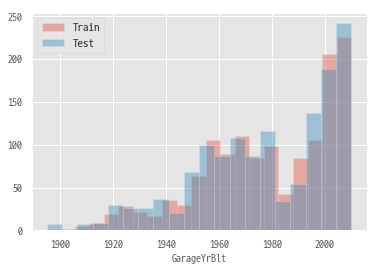

In [512]:
# display
sns.distplot(train.loc[train["GarageYrBlt"].notnull(), "GarageYrBlt"], kde=False, bins=20)
sns.distplot(test.loc[test["GarageYrBlt"].notnull(), "GarageYrBlt"], kde=False, bins=20)
plt.legend(['Train','Test'])

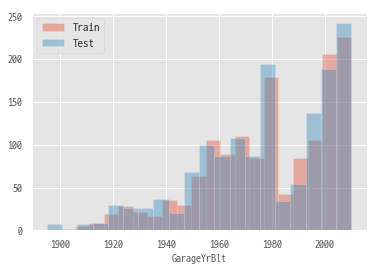

In [513]:
# 방법1. 차고가 없는 경우는 'GarageYrBlt'도 NA로 되어 있으므로 --> 전체 GarageYrBlt의 중간년도로 대체
train["GarageYrBlt"].fillna(train["GarageYrBlt"].median(), inplace=True) # 1980
test["GarageYrBlt"].fillna(test["GarageYrBlt"].median(), inplace=True) # 1979

# display
sns.distplot(train.loc[train["GarageYrBlt"].notnull(), "GarageYrBlt"], kde=False, bins=20)
sns.distplot(test.loc[test["GarageYrBlt"].notnull(), "GarageYrBlt"], kde=False, bins=20)
plt.legend(['Train','Test'])

### 방법2.  --> YearBuilt 값으로 대체 -->데이터 처리에 실패!!!

In [514]:


#train["GarageYrBlt"] = tmpTrain.copy()
# test["GarageYrBlt"] = tmpTest.copy()

#train["GarageYrBlt"].fillna(train["YearBuilt"], inplace=True)
#test["GarageYrBlt"].fillna(test["YearBuilt"], inplace=True)

#for row in range(0, 1460):
  
#temp=train[train["GarageYrBlt"].isnull()]
#train[temp["GarageYrBlt"],"Id"] 

#sns.distplot(train.loc[train["GarageYrBlt"].notnull(), "GarageYrBlt"], kde=False, bins=20)
#sns.distplot(test.loc[test["GarageYrBlt"].notnull(), "GarageYrBlt"], kde=False, bins=20)
#plt.legend(['Train','Test'])

In [515]:
# Fence, NA(1179) - No Fence,
# house["Fence"].value_counts()
train["Fence"].fillna(value='None', inplace=True)
test["Fence"].fillna(value='None', inplace=True)

# one and hot encoding

In [516]:
# MiscFeature, NA(1406) - None ,
train["MiscFeature"].fillna(value='None', inplace=True)
test["MiscFeature"].fillna(value='None', inplace=True)

# one and hot encoding


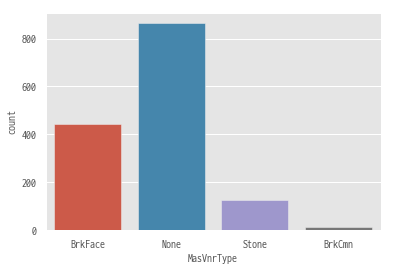

In [517]:
#house["MasVnrType"].isnull().sum() # Category, NA - 8개, --> 최빈값 'None'
train["MasVnrArea"].isnull().sum() # Nominal,  NA - 8, --> 0
sns.countplot(x="MasVnrType", data=train)

# one and hot encoding

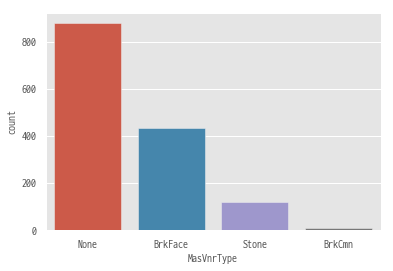

In [518]:
test["MasVnrArea"].isnull().sum() # Nominal,  NA --> 0, category --> 최빈값 'None'
sns.countplot(x="MasVnrType", data=test)

# one-and-hot encoding

In [519]:
# MasVnrType
train["MasVnrType"].fillna(value='None', inplace=True)
test["MasVnrType"].fillna(value='None', inplace=True)
# MasVnrArea
train["MasVnrArea"].fillna(value=0, inplace=True)    
test["MasVnrArea"].fillna(value=0, inplace=True)    

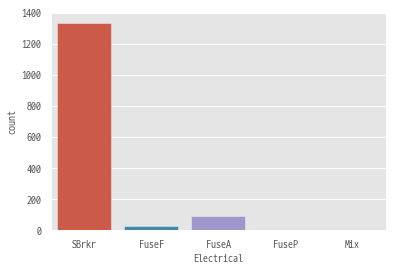

In [520]:
# Electrical, category, NA - 1개,  NA --> 최빈값 'SBrkr'
# house["Electrical"].isnull().sum() # 1개
sns.countplot(x="Electrical", data=train)
train["Electrical"].fillna(value='SBrkr', inplace=True)  


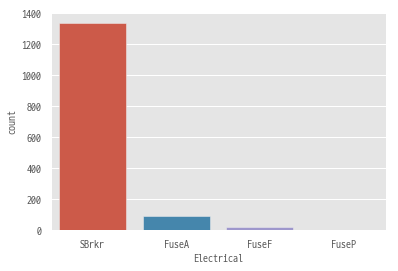

In [521]:
sns.countplot(x="Electrical", data=test)

## Train에 대한 처리는 끝, Test에 남아 있는 나머지 features 설정

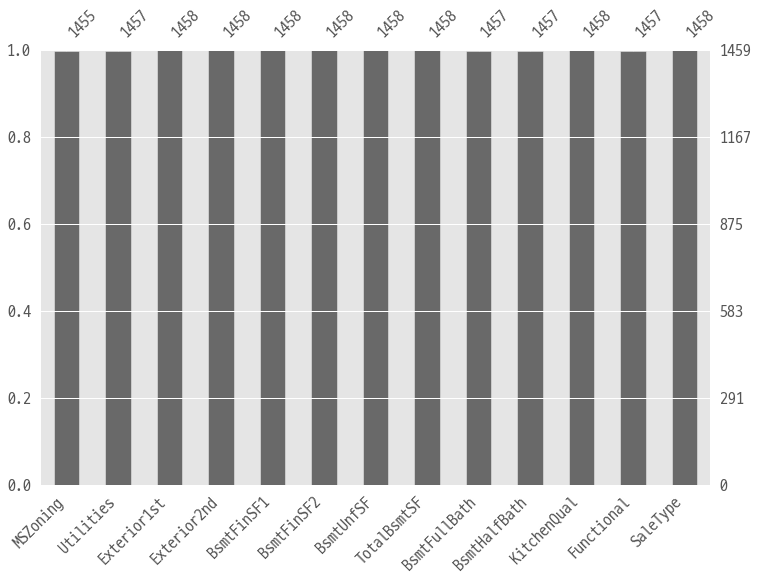

In [522]:
missingdata_test = test.columns[test.isnull().any()].tolist()
#msno.matrix(test[missingdata_test])
msno.bar(test[missingdata_test],  figsize=(12,8))

In [523]:
# Category, NaN =>  최빈값으로 대체, Nominal ==> 0 또는 median
# attributes=['MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType']

test["MSZoning"].value_counts() # MSZoning : NA -> RL
test["MSZoning"].fillna(value='RL', inplace=True)

In [524]:
test["Utilities"].value_counts() # Utilities : NA -> AllPub
test["Utilities"].fillna(value='AllPub', inplace=True)

In [525]:
test["Exterior1st"].value_counts() # Exterior1st : NA -> VinylSd
test["Exterior1st"].fillna(value='VinylSd', inplace=True)

In [526]:
test["Exterior2nd"].value_counts() # Exterior2nd : NA -> VinylSd
test["Exterior2nd"].fillna(value='VinylSd', inplace=True)

In [527]:
test["KitchenQual"].value_counts() # KitchenQual : NA -> TA
test["KitchenQual"].fillna(value='TA', inplace=True)

In [528]:
test["Functional"].value_counts() # Functional : NA -> Typ
test["Functional"].fillna(value='Typ', inplace=True)

In [529]:
test["SaleType"].value_counts() # SaleType : NA -> WD
test["SaleType"].fillna(value='WD', inplace=True)

In [530]:
# Nominal feature
attributes = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']
for col in attributes:
    test[col].fillna(test[col].median(), inplace=True)

In [531]:
print(train.shape)

(1460, 81)


In [532]:
print(test.shape)

(1459, 80)


## categorical data --> numerical data

In [538]:
train_drop=train.drop(columns=["SalePrice"])
print('원본특성:\n',list(train_drop.columns))

원본특성:
 ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', '

In [539]:
#test_drop=test.drop(columns=["SalePrice"])
print('원본특성:\n',list(test.columns))

원본특성:
 ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', '

In [541]:
train_drop=train.drop(columns=["SalePrice"])
train_dummy=pd.get_dummies(train_drop)
print('원본특성:\n',list(train_dummy.columns))

원본특성:
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_None', 'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighbo

In [544]:
train_dummy.shape

(1460, 297)

In [545]:
#train_drop=train.drop(columns=["SalePrice"])
test_dummy=pd.get_dummies(test)
print('원본특성:\n',list(test_dummy.columns))

원본특성:
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_None', 'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Nei

In [546]:
test_dummy.shape

(1459, 280)

In [547]:
# 'Utilities_NoSeWa','Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn','HouseStyle_2.5Fin',
# 'RoofMatl_ClyTile','RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll','Exterior1st_ImStucc', 
# 'Exterior1st_Stone','Exterior2nd_Other', 'Heating_Floor','Heating_OthW','Electrical_Mix',
# 'GarageQual_Ex', 'MiscFeature_TenC',
#
# train에는 있는 features에서 test에는 17개 features가 없음.

In [548]:
temptrain_dummy = train_dummy.copy()
train_dummy=train_dummy.drop(columns=['Utilities_NoSeWa','Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn','HouseStyle_2.5Fin','RoofMatl_ClyTile','RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll','Exterior1st_ImStucc','Exterior1st_Stone','Exterior2nd_Other', 'Heating_Floor','Heating_OthW','Electrical_Mix','GarageQual_Ex', 'MiscFeature_TenC'])

In [549]:
train_dummy.shape

(1460, 280)

## NaN(NA)정리 완료

In [551]:
# SalePrice object -> int , log 스케일로 변환
#train_dummy['logSalePrice']=np.log1p(train['SalePrice'].astype("float64"));

#house.info()

#sns.distplot(train_dummy['logSalePrice'])


## testing model

1. train 데이터셋을 2개로 분리하여 train/validation data set을 만든다.
2. train/validation data set으로 모델을 만들고 검증한다.
3. test 셋에 적용하여 Prediction한다.



우선
- train 데이터셋에서 Id, SalePrice, logSalePrice를 drop 시키고 --> X_train
- logSalePrice                                                 --> Y_train
- test 데이터셋에서 Id를 drop 시키고 X_test로 생성하여 SalePrice를 예측하는 것

In [589]:
# creating train & test data set

X_train = train_dummy.drop("Id", axis=1).values
y_train = np.log1p(train['SalePrice'].astype("float64"))
#X_test = test.drop("Id", axis=1).values
X_test = test_dummy.drop("Id", axis=1).values

In [590]:
# creating train/validation data set
from sklearn.model_selection import train_test_split

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Linear Regression

In [591]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lin_reg =LinearRegression()
lin_reg.fit(X_training, y_training)
#lin_reg.intercept_, lin_reg.coef_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [592]:
y_valid_pred=lin_reg.predict(X_valid)
r2_lin = r2_score(y_valid, y_valid_pred)
rmse_lin = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
print("R^2 Score: " + str(r2_lin))
print("RMSE Score: " + str(rmse_lin))

R^2 Score: 0.9064137129728952
RMSE Score: 0.13215229676590892


In [593]:
# 교차 검증(K-fold cross validation test)
from sklearn.model_selection import cross_val_score

score = cross_val_score(lin_reg,  X_training, y_training, cv=10, scoring="r2")
print("Cross Validation score: " + str(np.mean(score)))  # max_score = 4, 0.85999

Cross Validation score: 0.7756143907937296


#### LinearRegression에 대한 GridSearchCV를 이용한 최적의 parameter 찾기

In [594]:
# GridSearchCV를 이용한 최적의 parameter 찾기

from sklearn.model_selection import GridSearchCV

lin_reg_grid = LinearRegression()
parameters_lin = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False]}
grid_linreg = GridSearchCV(lin_reg_grid, parameters_lin, verbose=1 , scoring = "r2")
grid_linreg.fit(X_training, y_training)

print("Best LinReg Model: " + str(grid_linreg.best_estimator_))
print("Best Score: " + str(grid_linreg.best_score_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best LinReg Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Best Score: 0.7567909664550828


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.7s finished


In [595]:
lin_reg_best = grid_linreg.best_estimator_
lin_reg_best.fit(X_training, y_training)
lin_pred = lin_reg_best.predict(X_valid)
r2_lin = r2_score(y_valid, lin_pred)
rmse_lin = np.sqrt(mean_squared_error(y_valid, lin_pred))
print("R^2 Score: " + str(r2_lin))
print("RMSE Score: " + str(rmse_lin))

R^2 Score: 0.9064137129728952
RMSE Score: 0.13215229676590892


In [596]:
scores_lin = cross_val_score(lin_reg_best, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_lin)))

Cross Validation Score: 0.7756143907937296


###  Ridge Model

In [597]:
from sklearn.linear_model import Ridge

ridge = Ridge()
parameters_ridge = {"alpha":[0.001, 0.01, 0.1, 1], "fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False], "solver" : ["auto"]}
grid_ridge = GridSearchCV(ridge, parameters_ridge, verbose=1, scoring="r2")
grid_ridge.fit(X_training, y_training)

print("Best Ridge Model: " + str(grid_ridge.best_estimator_))
print("Best Score: " + str(grid_ridge.best_score_))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Ridge Model: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
   random_state=None, solver='auto', tol=0.001)
Best Score: 0.84848814683815


[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    0.9s finished


In [598]:
ridge = grid_ridge.best_estimator_
ridge.fit(X_training, y_training)
ridge_pred = ridge.predict(X_valid)
r2_ridge = r2_score(y_valid, ridge_pred)
rmse_ridge = np.sqrt(mean_squared_error(y_valid, ridge_pred))
print("R^2 Score: " + str(r2_ridge))
print("RMSE Score: " + str(rmse_ridge))

R^2 Score: 0.8879584239755818
RMSE Score: 0.14459664333928982


In [599]:
scores_lin = cross_val_score(ridge, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_lin)))

Cross Validation Score: 0.8527024068220272


### Lasso Model

In [600]:
from sklearn.linear_model import Lasso

lasso = Lasso()
parameters_lasso = {"alpha":[0.001, 0.01, 0.1, 1], "fit_intercept":[True, False], "normalize":[True, False], "copy_X":[True, False]}

grid_lasso = GridSearchCV(lasso, parameters_lasso, verbose=1, scoring="r2")
grid_lasso.fit(X_training, y_training)

print("Best Ridge Model: " + str(grid_lasso.best_estimator_))
print("Best Score: " + str(grid_lasso.best_score_))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Ridge Model: Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Best Score: 0.8522349996004747


[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    8.1s finished


In [601]:
lasso = grid_lasso.best_estimator_
lasso.fit(X_training, y_training)
lasso_pred = lasso.predict(X_valid)
r2_lasso = r2_score(y_valid, lasso_pred)
rmse_lasso = np.sqrt(mean_squared_error(y_valid, lasso_pred))
print("R^2 Score: " + str(r2_lasso))
print("RMSE Score: " + str(rmse_lasso))

R^2 Score: 0.8947139939242988
RMSE Score: 0.14016963179796596


In [602]:
scores_lasso = cross_val_score(lasso, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_lasso)))

Cross Validation Score: 0.8487206484352295


### Decision Tree Regressor Model

In [603]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

parameters_dtr = {"criterion":["mse","mae","friedman_mse"], "splitter":["best","random"], "max_depth":[3, 5, 7, 9], "max_features":["auto","sqrt","log2"],
                 "min_samples_split":[2, 3, 5, 10]}

grid_dtr = GridSearchCV(dtr, parameters_dtr, verbose=1, scoring="r2")
grid_dtr.fit(X_training, y_training)

print("Best Ridge Model: " + str(grid_dtr.best_estimator_))
print("Best Score: " + str(grid_dtr.best_score_))

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=1)]: Done 864 out of 864 | elapsed:   51.4s finished


Best Ridge Model: DecisionTreeRegressor(criterion='mae', max_depth=5, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
Best Score: 0.7378540756482347


In [604]:
dtr = grid_dtr.best_estimator_
dtr.fit(X_training, y_training)
dtr_pred = dtr.predict(X_valid)
r2_dtr = r2_score(y_valid,dtr_pred)
rmse_dtr = np.sqrt(mean_squared_error(y_valid, dtr_pred))
print("R^2 Score: " + str(r2_dtr))
print("RMSE Score: " + str(rmse_dtr))

R^2 Score: 0.8081327649302014
RMSE Score: 0.18922086146675043


In [605]:
scores_dtr = cross_val_score(dtr, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_dtr)))

Cross Validation Score: 0.7293294468788393


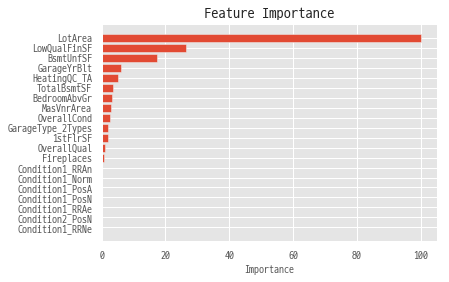

In [607]:
# 중요도 top 20

feature_importance = dtr.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[-20:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, test_dummy.keys()[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

### Stochastic Gradient Descent Regressor(SGDRegressor)

In [608]:
from sklearn.linear_model  import SGDRegressor

sgd = SGDRegressor()

parameters_sgd = {"max_iter":[1000, 10000], "alpha":[0.00001, 0.001], "epsilon":[0.001, 0.0001]}

grid_sgd = GridSearchCV(sgd, parameters_sgd, verbose=1, scoring="r2")
grid_sgd.fit(X_training, y_training)

print("Best SGD Model: " + str(grid_sgd.best_estimator_))
print("Best Score: " + str(grid_sgd.best_score_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  1.8min finished


Best SGD Model: SGDRegressor(alpha=1e-05, average=False, epsilon=0.001, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=10000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)
Best Score: -3.1339952328873345e+33


In [609]:
sgd = grid_sgd.best_estimator_
sgd.fit(X_training, y_training)
sgd_pred = sgd.predict(X_valid)
r2_sgd = r2_score(y_valid,sgd_pred)
rmse_sgd = np.sqrt(mean_squared_error(y_valid, dtr_pred))
print("R^2 Score: " + str(r2_sgd))
print("RMSE Score: " + str(rmse_sgd))

R^2 Score: -1.5606964999668896e+33
RMSE Score: 0.18922086146675043


In [610]:
scores_sgd = cross_val_score(sgd, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_sgd)))

Cross Validation Score: -1.068091624860236e+34


### Random Forest Regressor Model

In [611]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

parameters_rfr = {"n_estimators":[10, 50, 100], "min_samples_split":[2, 3, 5, 10],"max_features":["auto","sqrt","log2"], "random_state": [42] }

grid_rfr = GridSearchCV(rfr, parameters_rfr, verbose=1, scoring="r2")
grid_rfr.fit(X_training, y_training)

print("Best RFR Model: " + str(grid_rfr.best_estimator_))
print("Best Score: " + str(grid_rfr.best_score_))

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   46.7s finished


Best RFR Model: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)
Best Score: 0.8660592246423218


In [612]:
rfr = grid_rfr.best_estimator_
rfr.fit(X_training, y_training)
rfr_pred = rfr.predict(X_valid)
r2_rfr = r2_score(y_valid,rfr_pred)
rmse_rfr = np.sqrt(mean_squared_error(y_valid, dtr_pred))
print("R^2 Score: " + str(r2_rfr))
print("RMSE Score: " + str(rmse_rfr))

R^2 Score: 0.8872829873219374
RMSE Score: 0.18922086146675043


In [613]:
scores_rfr = cross_val_score(rfr, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_rfr)))

Cross Validation Score: 0.8587125283243099


### Gradient Boosting regression

In [614]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

parameters_gbr = {"alpha":[0.0001, 0.001, 0.9],"n_estimators":[500, 1000], "learning_rate": [0.01, 0.1], "min_samples_split":[2, 3, 5, 10],
                  "loss":["ls"], "max_features":["auto","sqrt","log2"], "random_state": [42] }

grid_gbr = GridSearchCV(gbr, parameters_gbr, verbose=1, scoring="r2")
grid_gbr.fit(X_training, y_training)

print("Best GBr Model: " + str(grid_gbr.best_estimator_))
print("Best Score: " + str(grid_gbr.best_score_))

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=1)]: Done 432 out of 432 | elapsed: 14.2min finished


Best GBr Model: GradientBoostingRegressor(alpha=0.0001, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=5,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=42, subsample=1.0, verbose=0,
             warm_start=False)
Best Score: 0.8948915433507042


In [615]:
gbr = grid_gbr.best_estimator_
gbr.fit(X_training, y_training)
gbr_pred = gbr.predict(X_valid)
r2_gbr = r2_score(y_valid,gbr_pred)
rmse_gbr = np.sqrt(mean_squared_error(y_valid, gbr_pred))
print("R^2 Score: " + str(r2_gbr))
print("RMSE Score: " + str(rmse_gbr))

R^2 Score: 0.9075254157864409
RMSE Score: 0.13136503941099356


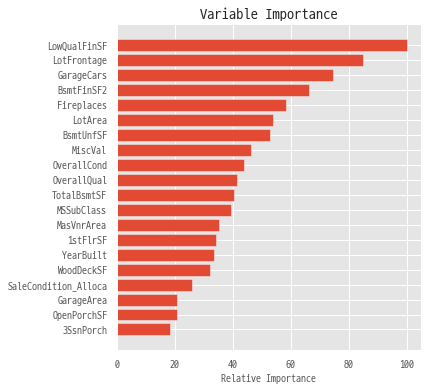

In [616]:
mse = mean_squared_error(y_valid, gbr.predict(X_valid))
mse
plt.figure(figsize=(12, 6))

feature_importance = gbr.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[-20:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, test_dummy.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [617]:
model_performances = pd.DataFrame({"Model":["Linear Regression","Ridge","Lasso","Decision Tree Regressor","SGDRegressor","Random Forest Regressor","Gradient Boosting regression"],
                                 "Best Score":[str(grid_linreg.best_score_)[0:5], str(grid_ridge.best_score_)[0:5], str(grid_lasso.best_score_)[0:5], str(grid_dtr.best_score_)[0:5],
                                              str(grid_sgd.best_score_)[0:5], str(grid_rfr.best_score_)[0:5],str(grid_gbr.best_score_)[0:5]],
                                 "R^2":[str(r2_lin)[0:5], str(r2_ridge)[0:5], str(r2_lasso)[0:5], str(r2_dtr)[0:5], str(r2_sgd)[0:5], str(r2_rfr)[0:5], str(r2_gbr)[0:5]],
                                 "RSME":[str(rmse_lin)[0:8], str(rmse_ridge)[0:8], str(rmse_lasso)[0:8], str(rmse_dtr)[0:8], str(rmse_sgd)[0:8], str(rmse_rfr)[0:8],str(rmse_gbr)[0:8]]})

model_performances.sort_values(by="R^2", ascending=False)

,Model,Best Score,R^2,RSME
6,Gradient Boosting regression,0.894,0.907,0.131365
0,Linear Regression,0.756,0.906,0.132152
2,Lasso,0.852,0.894,0.140169
1,Ridge,0.848,0.887,0.144596
5,Random Forest Regressor,0.866,0.887,0.189220
3,Decision Tree Regressor,0.737,0.808,0.189220
4,SGDRegressor,-3.13,-1.56,0.189220


In [618]:
import datetime

now = datetime.datetime.now()
nowDatetime = now.strftime('%Y%m%d_%H%M%S')
print(nowDatetime)  # 2015-04-19 12:11:32

submission_predictions = np.exp(gbr.predict(X_test))

submission = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": submission_predictions
    })

submission.to_csv(nowDatetime+"_SalePrices.csv", index=False)
print(submission.shape)

20190214_235341
(1459, 2)


## Random Forest Regressor Model 모델 생성 오류 수정 전후 스코어

모델 파라메터 결정을 위해 사용한 데이터 오류
#### 수정 전(첫번째 시도)
rfr.fit(X_train, y_train) # score: 0.17006 - ranking: 3456

![](images/이미지_20190110_155024_001.png)
#### 수정 후(세번째 시도)
rfr.fit(X_training, y_training) # score: 0.15758 - ranking: 3222

#### 두번째 시도는 LinearRegression인데 score: 0.24731 ㅠㅠ

![](images/이미지_20190111_071218_001.png)


#### One-and-Hot Encoding 처리 후 (4번째 시도)
![](images/이미지_20190214_235833_001.png) # score: 0.13362 - ranking: 1867

